In [ ]:
!pip3 install NewsSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.0/919.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
from NewsSentiment import TargetSentimentClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
tsc = TargetSentimentClassifier()
vader_analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 584M/584M [00:15<00:00, 39.3MB/s]


# Load Data

In [ ]:
import numpy as np
import pandas as pd
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
df= pd.read_csv('Ukraine_before_conflict_preprocessed.csv', encoding='latin-1')
df.head()

article_title     author  \
0  Ukrainian president expects no conflict with R...  By Xinhua   
1  British PM announces sanctions against Russia ...  By Xinhua   
2  NATO chief urges Russia to choose diplomacy in...  By Xinhua   
3  EU agrees Russia sanctions package, warns of f...  By Xinhua   
4  Russia's upper house approves use of military ...  By Xinhua   

                     published_time  \
0  Published: Feb 23, 2022 09:34 AM   
1  Published: Feb 23, 2022 09:37 AM   
2  Published: Feb 23, 2022 09:41 AM   
3  Published: Feb 23, 2022 09:42 AM   
4  Published: Feb 23, 2022 09:48 AM   

                                        article_text  
0  Ukraine President Volodymyr Zelensky attends a...  
1  UK Prime Minister Boris Johnson Photo: VCGÂ UK...  
2  NATO Secretary General Jens Stoltenberg speaks...  
3  EU Commission President Ursula von der Leyen m...  
4  Russia President Vladimir Putin signs document...

In [ ]:
df.shape

(187, 4)

In [ ]:
#check and remove incomplete data
check_condition = (df['article_text'] == 'Article text not found') & (df['author'] == 'Author not found')
df = df[~check_condition]

In [ ]:
df['published_time'] = df['published_time'].str.replace('Published: ', '')
df['published_time'] = pd.to_datetime(df['published_time'], format='%b %d, %Y %I:%M %p')
df['published_time'].head()

0   2022-02-23 09:34:00
1   2022-02-23 09:37:00
2   2022-02-23 09:41:00
3   2022-02-23 09:42:00
4   2022-02-23 09:48:00
Name: published_time, dtype: datetime64[ns]

In [ ]:
#df = df.iloc[103:187]
#df

#df = df.drop(103)

# Pre-processing

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#split each article into sentences
def split_into_sentences(article):
    doc = nlp(article)
    return [sent.text for sent in doc.sents]

In [ ]:
target_entities = [
    "Russia", "Moscow", "China", "Beijing", "Ukraine",
    "Kiev", "US", "France", "West", "Joe Biden",
    "Xi Jinping", "Vladimir Putin", "Wang Yi", "Antony Blinken", "Volodymyr Zelensky",
    "Donald Trump", "Emmanuel Macron", "EU", "EU Commision", "EU Council",
    "NATO", "UN", "Covid-19", "Cold War"
]

# Sentiment Analysis

In [ ]:
#vader
def vader_sentiment(text):
    scores = vader_analyzer.polarity_scores(text)
    #define the thresholds to categorize it
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
#initialize lists for comparison results
vader_results = []
tsc_results = []

In [ ]:
#threshold max sentence length
MAX_SENTENCE_LENGTH = 100

for idx, row in df.iterrows():
    article_text = row['article_text']
    sentences = split_into_sentences(article_text)

    for sentence in sentences:
        original_sentence = sentence
        sentence = sentence.lower()

        # skip sentences that exceed the maximum length threshold
        if len(sentence.split()) > MAX_SENTENCE_LENGTH:
            print(f"Skipping long sentence.")
            continue

        #TSC Sentiment Analysis
        for target in target_entities:
            if target.lower() in sentence:
                entity_start = sentence.find(target.lower())
                entity_end = entity_start + len(target)
                left_context = sentence[:entity_start]
                right_context = sentence[entity_end:]

                try:
                    sentiment_tsc = tsc.infer_from_text(left_context, target, right_context)
                except TargetNotFoundException:
                    print(f"TargetNotFoundException: {target} not found in {sentence}")
                    continue #move on to the next target

                sentiment_label_tsc = sentiment_tsc[0]['class_label'].lower()

                #store TSC result
                tsc_results.append({
                    'Model': 'TSC',
                    'Sentence': original_sentence,
                    'Target': target,
                    'Sentiment': sentiment_label_tsc,
                    'published_time': row['published_time']
                })

        #VADER (general sentiment analysis for the entire sentence)
        sentiment_vader = vader_sentiment(sentence)

        #store VADER result
        vader_results.append({
            'Model': 'VADER',
            'Sentence': original_sentence,
            'Sentiment': sentiment_vader,
            'published_time': row['published_time']
        })

Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.27s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.80s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.29s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.35s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.52s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:02<00:00,  2.02s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.50s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.36s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.42s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.35s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.38s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.87s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.39s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.30s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.29s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.30s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.25s/batch]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:01<00:00,  1.42s/batch]


In [ ]:
#convert both results to DataFrames
tsc_results_df = pd.DataFrame(tsc_results)
vader_results_df = pd.DataFrame(vader_results)

In [ ]:
#save results
tsc_results_df.to_excel('tsc_sentiment_results.xlsx', index=False)
vader_results_df.to_excel('vader_sentiment_results.xlsx', index=False)

# Visualization

## Overall Sentiment Distribution

In [ ]:
#aggregate sentiment counts for TSC
tsc_sentiment_counts = tsc_results_df['Sentiment'].value_counts()

#aggregate sentiment counts for VADER
vader_sentiment_counts = vader_results_df['Sentiment'].value_counts()

In [ ]:
sentiment_comparison = pd.DataFrame({
    'Negative': [tsc_sentiment_counts.get('negative', 0), vader_sentiment_counts.get('negative', 0)],
    'Neutral': [tsc_sentiment_counts.get('neutral', 0), vader_sentiment_counts.get('neutral', 0)],
    'Positive': [tsc_sentiment_counts.get('positive', 0), vader_sentiment_counts.get('positive', 0)]
}, index=['TSC', 'VADER'])

sentiment_comparison

Negative  Neutral  Positive
TSC        2197     7644      1567
VADER      2064     2224      2277

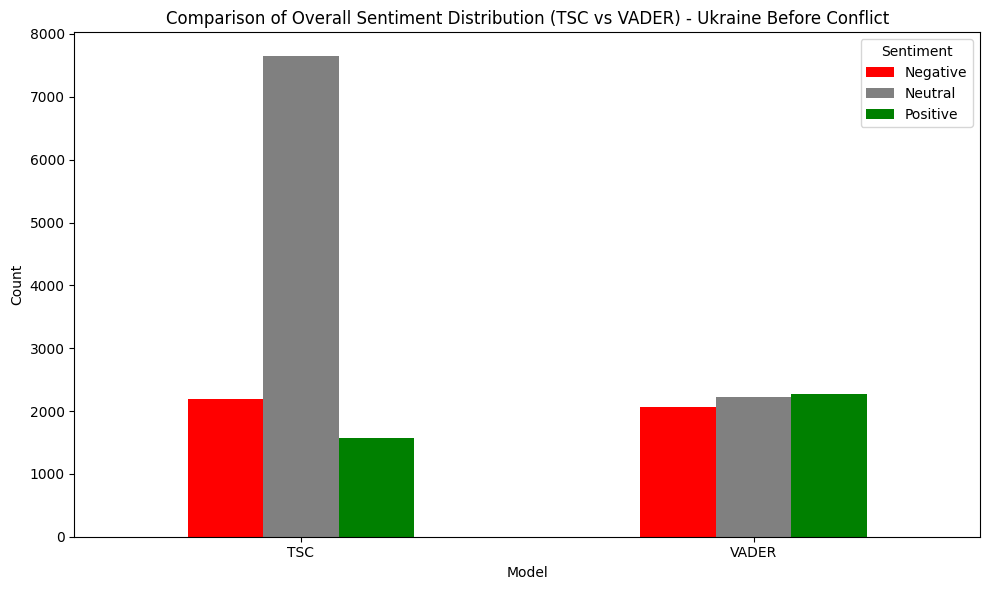

In [ ]:
sentiment_comparison.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(10, 6))
plt.title('Comparison of Overall Sentiment Distribution (TSC vs VADER) - Ukraine Before Conflict')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.show()

## Sentiment Over Time Comparison

In [ ]:
#process TSC results by month
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
tsc_sentiment_counts = tsc_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#normalize TSC sentiment proportions
tsc_sentiment_proportions = tsc_sentiment_counts.div(tsc_sentiment_counts.sum(axis=1), axis=0)

In [ ]:
#tsc_sentiment_proportions

In [ ]:
#process VADER results by month
vader_results_df['month'] = vader_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
vader_sentiment_counts = vader_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#vader_sentiment_counts

In [ ]:
#normalize VADER sentiment proportions
vader_sentiment_proportions = vader_sentiment_counts.div(vader_sentiment_counts.sum(axis=1), axis=0)

<Figure size 1200x600 with 0 Axes>

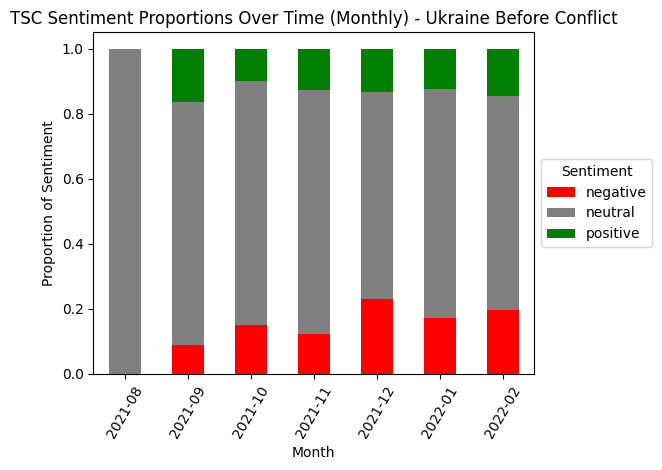

In [ ]:
#Plot 1: TSC Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
tsc_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('TSC Sentiment Proportions Over Time (Monthly) - Ukraine Before Conflict')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

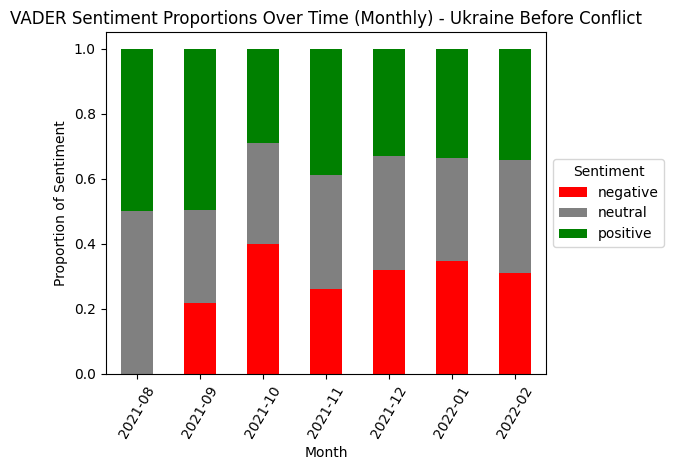

In [ ]:
#Plot 2: VADER Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
vader_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('VADER Sentiment Proportions Over Time (Monthly) - Ukraine Before Conflict')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Word Clouds

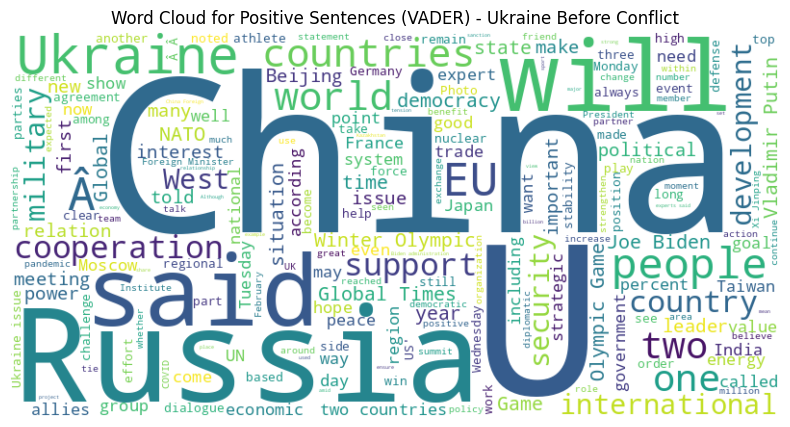

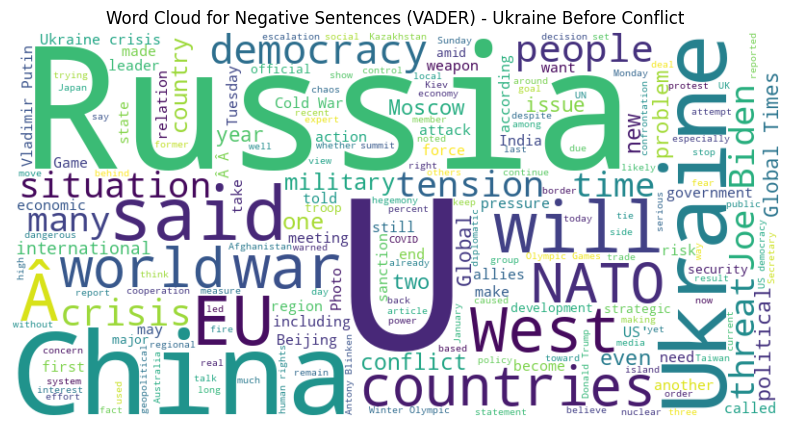

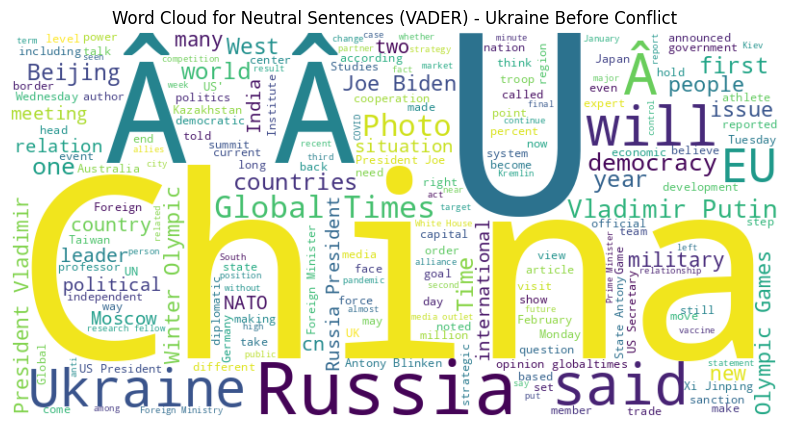

In [ ]:
#generate word cloud for VADER sentiment (positive, negative, neutral)
def wc_vader(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (VADER) - Ukraine Before Conflict')
        plt.show()

wc_vader('positive', vader_results_df)
wc_vader('negative', vader_results_df)
wc_vader('neutral', vader_results_df)


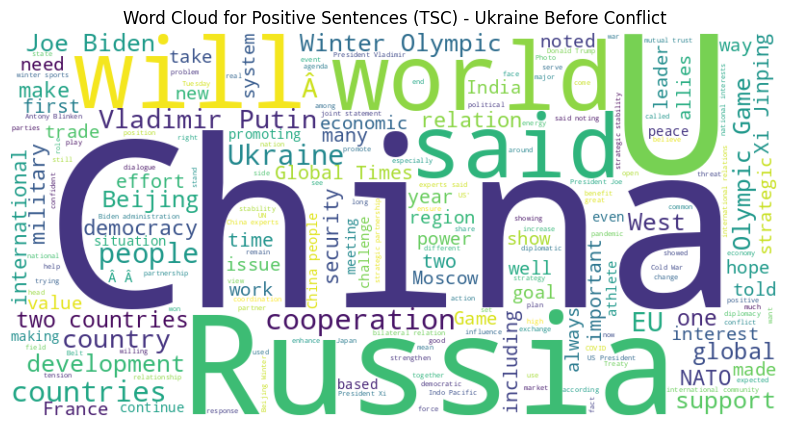

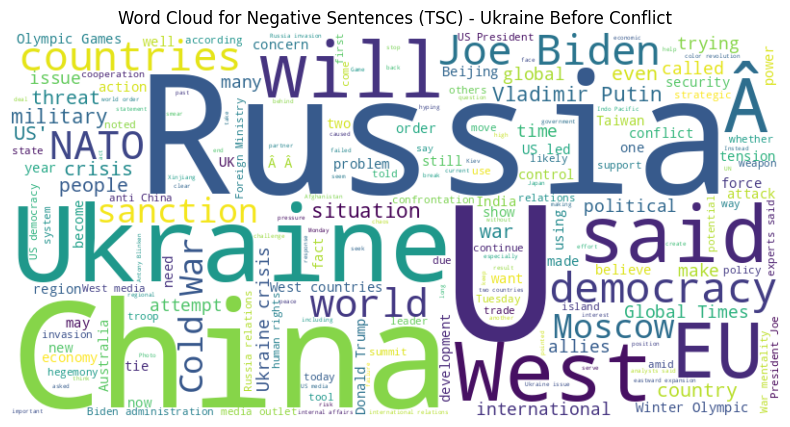

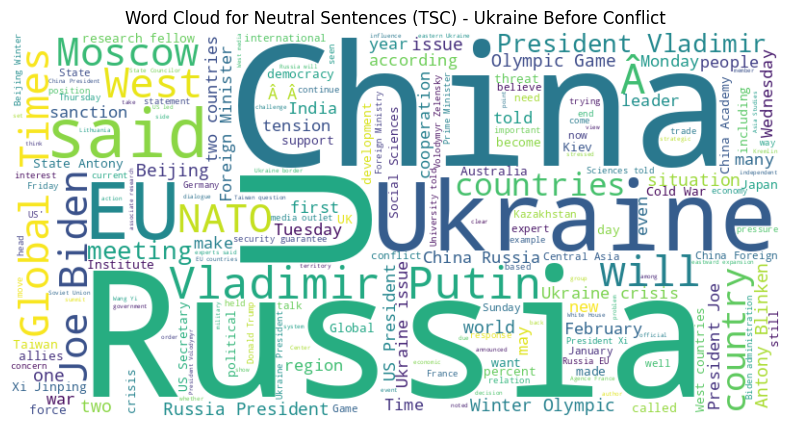

In [ ]:
#generate word cloud for TSC sentiment (positive, negative, neutral)
def wc_tsc(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (TSC) - Ukraine Before Conflict')
        plt.show()

wc_tsc('positive', tsc_results_df)
wc_tsc('negative', tsc_results_df)
wc_tsc('neutral', tsc_results_df)


## Targeted Sentiment Analysis Visualization using TSC

In [ ]:
#overall sentiment distribution per target
#group by target and sentiment, count the occurrences
overall_sentiment_per_target = tsc_results_df.groupby(['Target', 'Sentiment']).size().unstack(fill_value=0)
print(overall_sentiment_per_target )

#calculate sentiment proportions per target
overall_sentiment_per_target_proportion = overall_sentiment_per_target.div(overall_sentiment_per_target.sum(axis=1), axis=0)
overall_sentiment_per_target_proportion['Overall Sentiment'] = overall_sentiment_per_target_proportion[['positive', 'negative', 'neutral']].idxmax(axis=1)
print(overall_sentiment_per_target_proportion)

overall_sentiment_per_target_proportion.to_excel('overall_sentiment_per_target.xlsx')

Sentiment           negative  neutral  positive
Target                                         
Antony Blinken             3       54        14
Beijing                   20      153        28
China                    294      927       320
Cold War                  34       29         0
Covid-19                  18       76        10
Donald Trump              29       11         7
EU                        29      446        43
EU Council                 0        3         0
Emmanuel Macron            0        8         3
France                     4      102        20
Joe Biden                 57       82        60
Kiev                       8       43         3
Moscow                    36      102        17
NATO                      46      179        20
Russia                   568      531       131
UN                       236     1444       339
US                       607     2393       431
Ukraine                  100      628        23
Vladimir Putin            26      109   

<Figure size 1200x800 with 0 Axes>

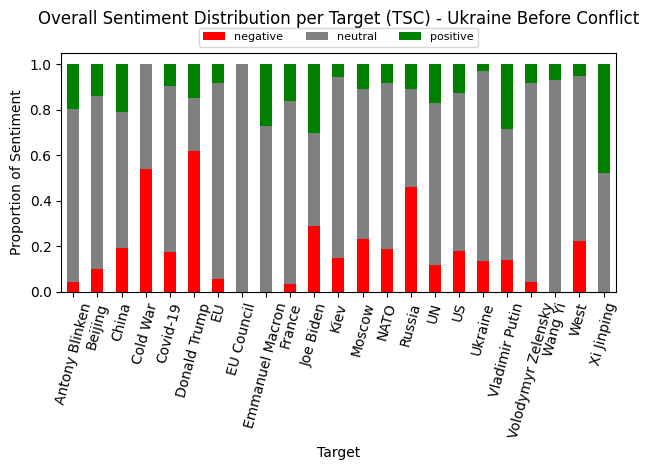

In [ ]:
#plot the stacked bar chart for overall sentiment distribution per target
plt.figure(figsize=(12, 8))
overall_sentiment_per_target_proportion.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('Overall Sentiment Distribution per Target (TSC) - Ukraine Before Conflict\n')
plt.xlabel('Target')
plt.ylabel('Proportion of Sentiment')
plt.xticks(rotation=75)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

## Visualization Sentiment Overtime for Target

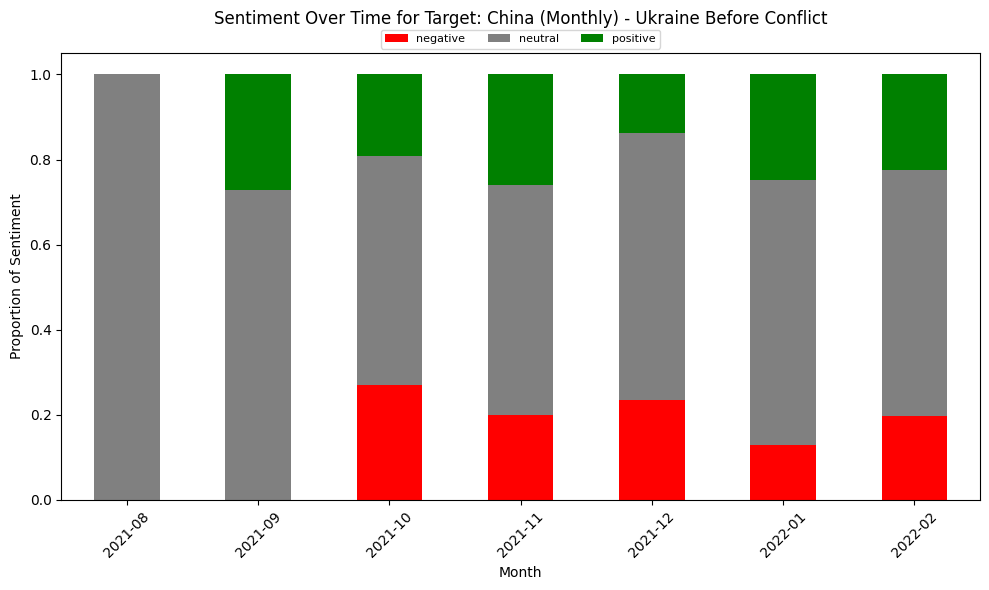

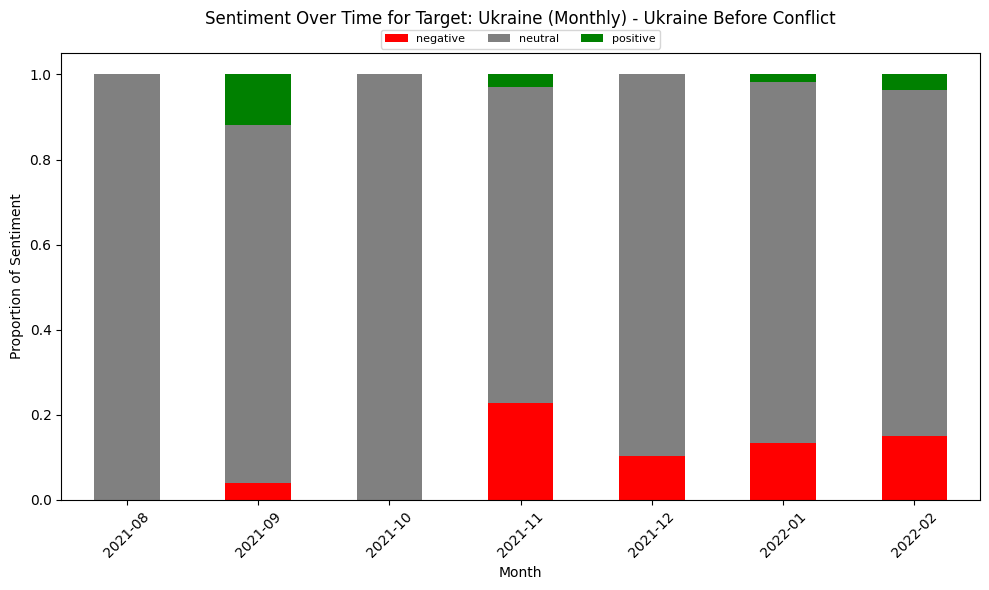

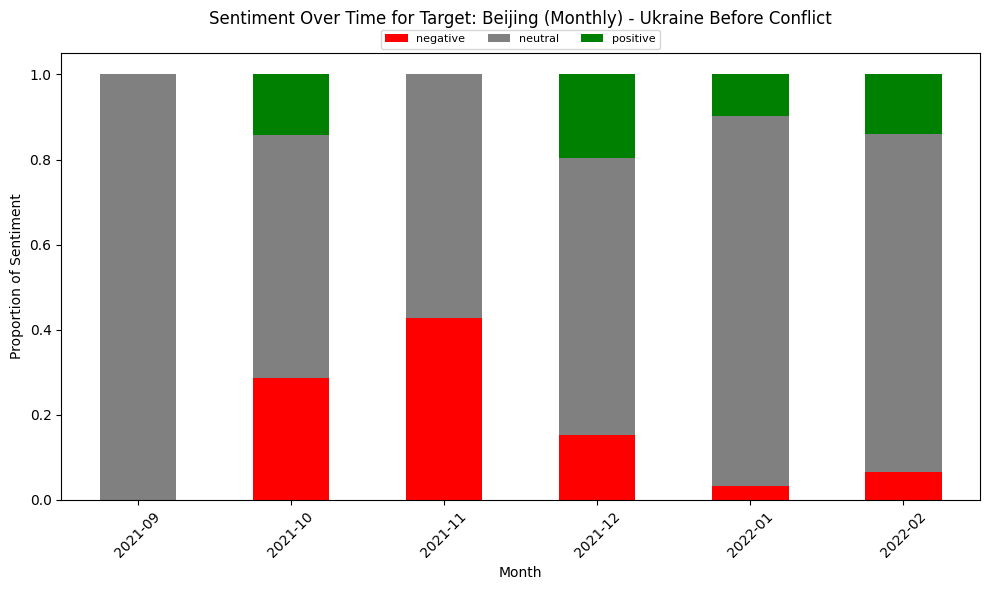

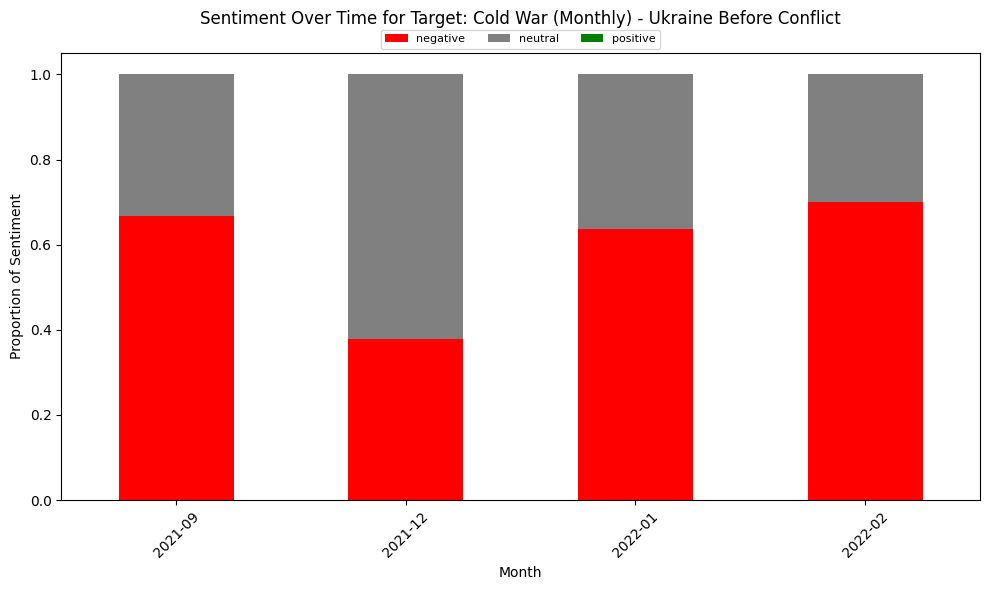

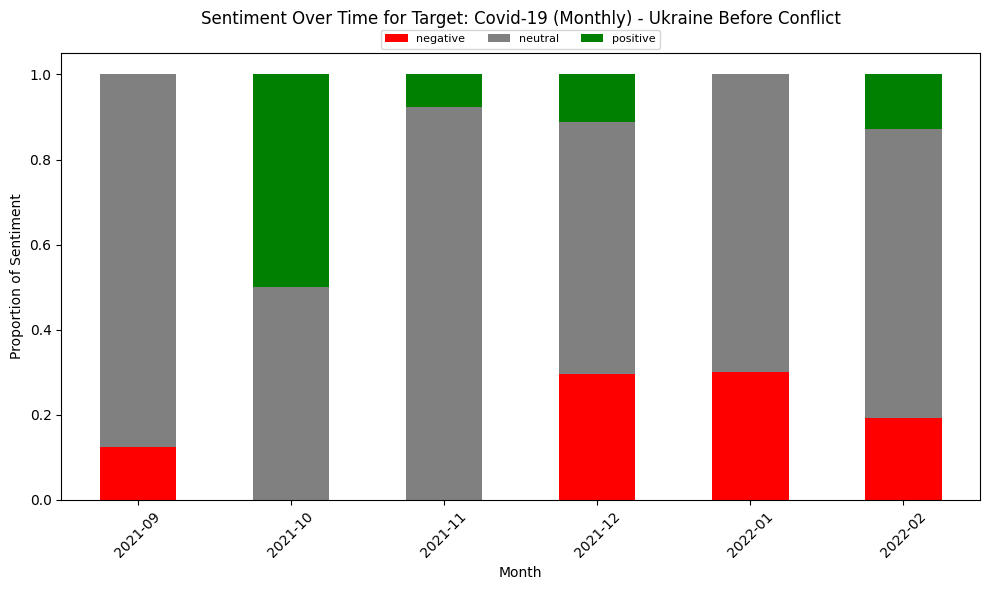

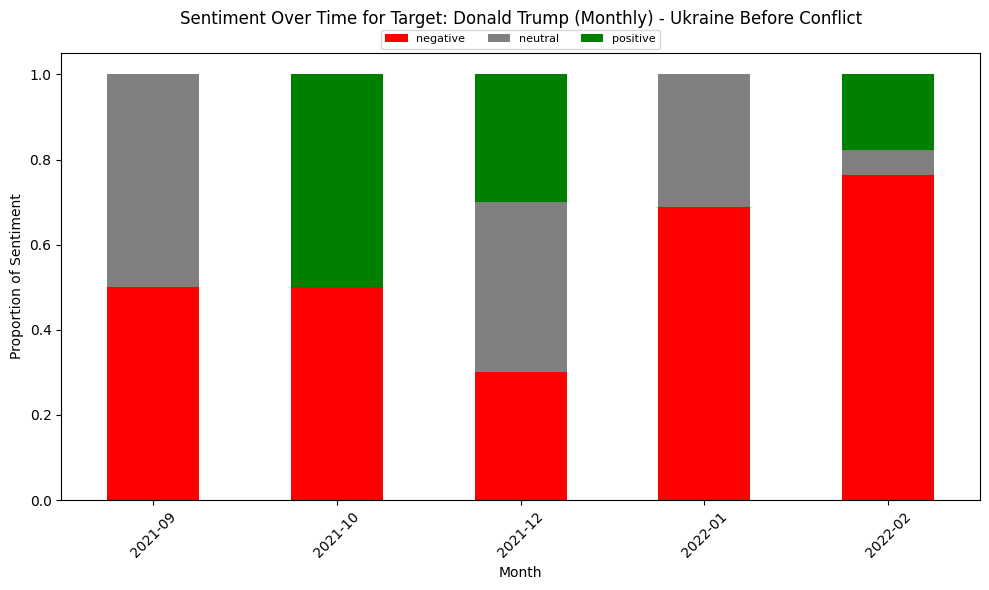

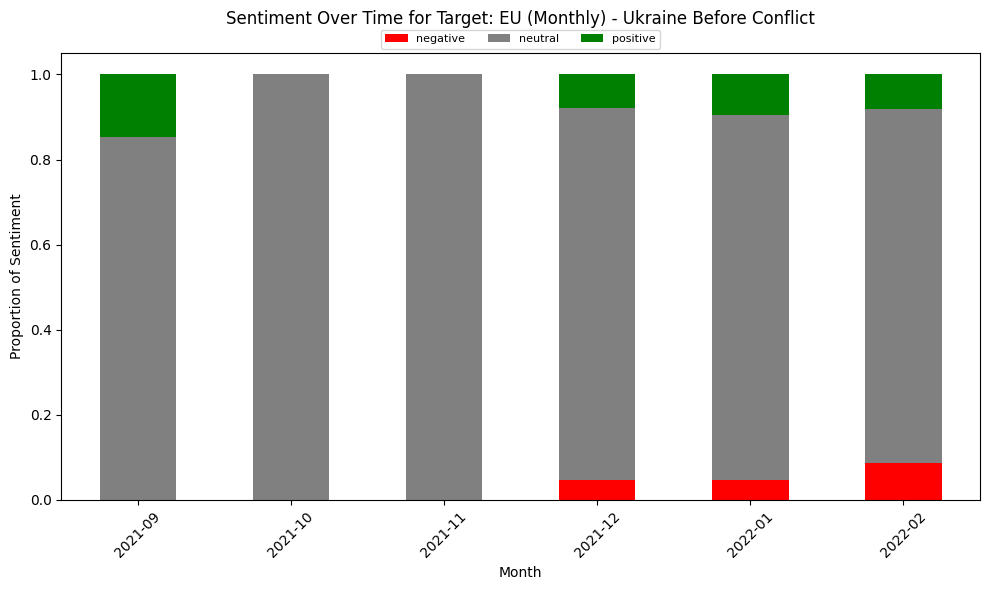

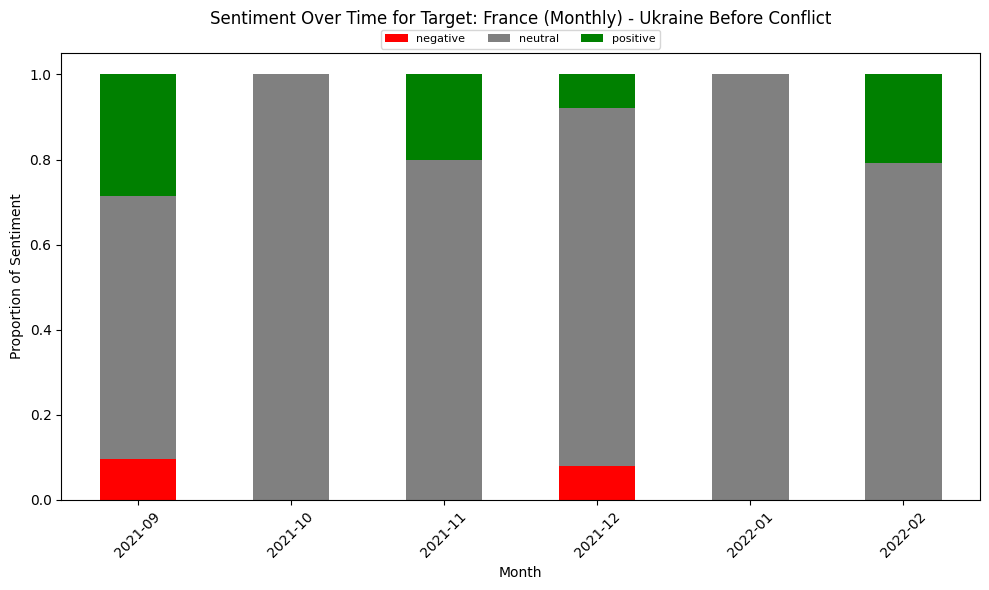

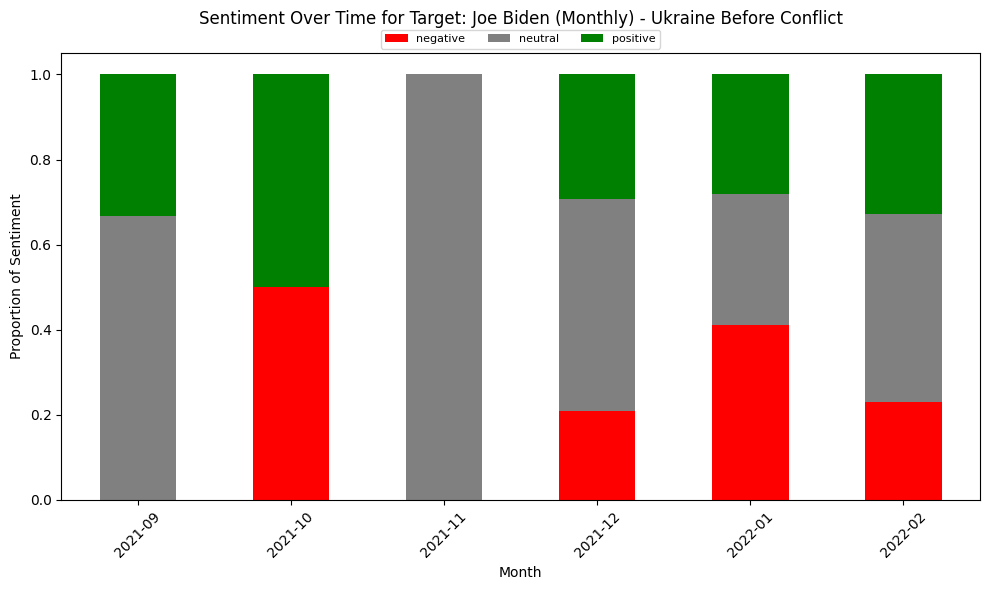

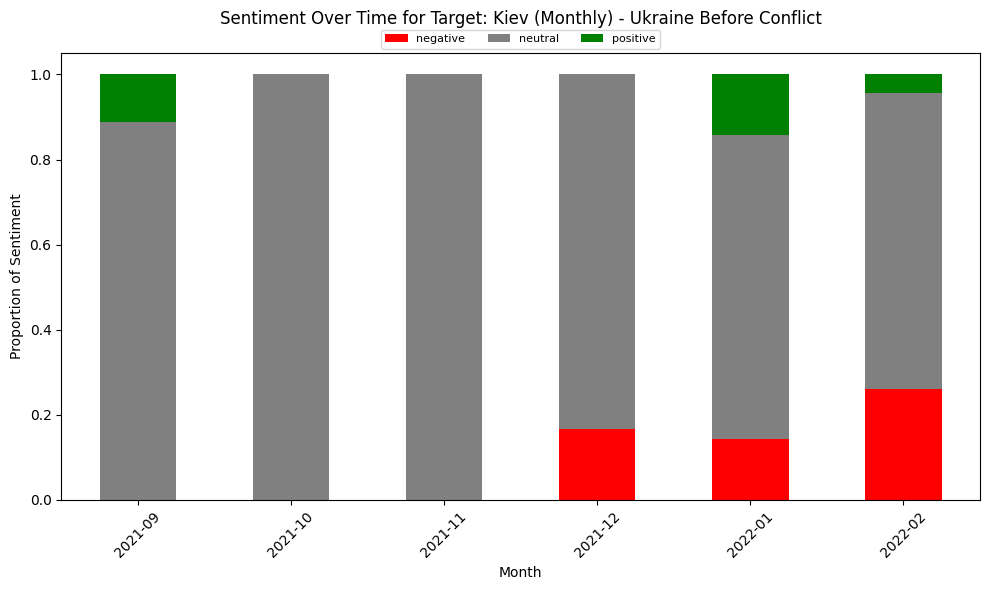

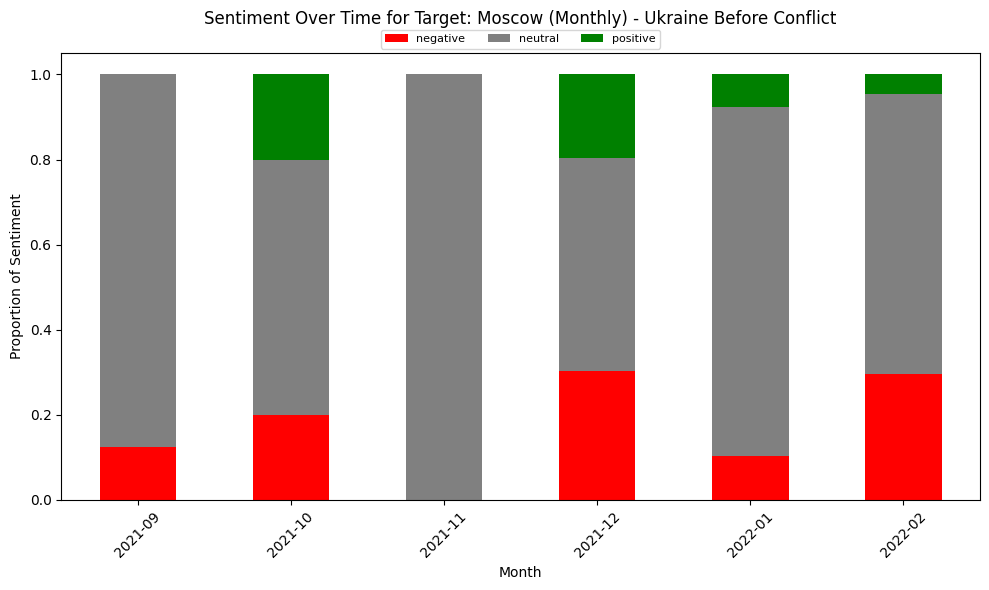

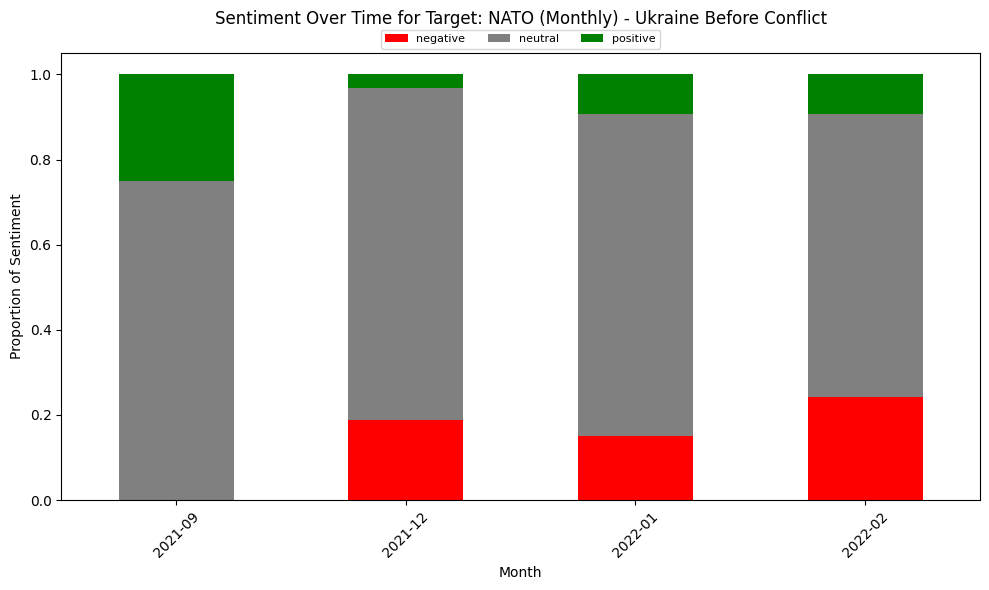

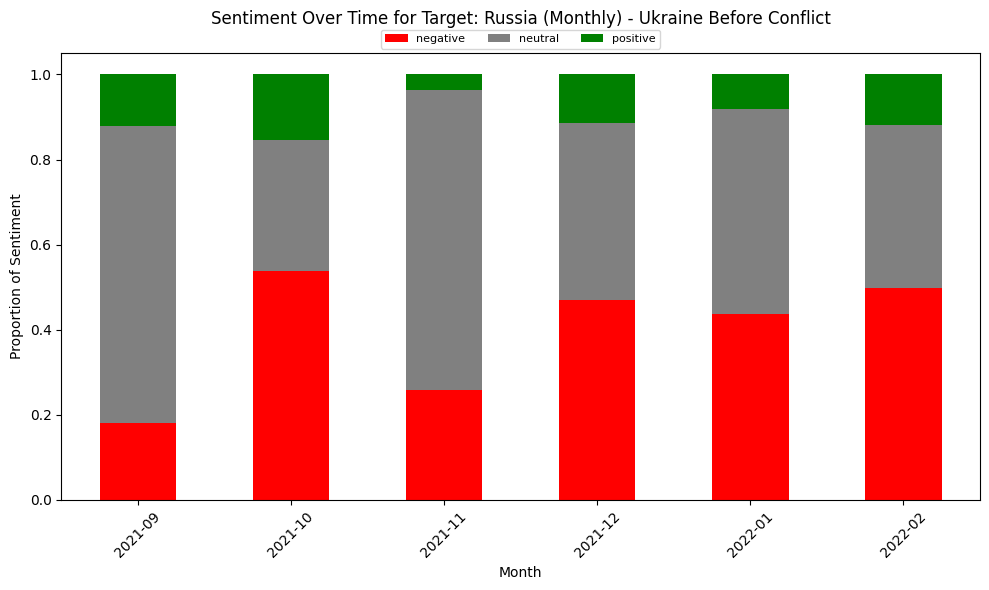

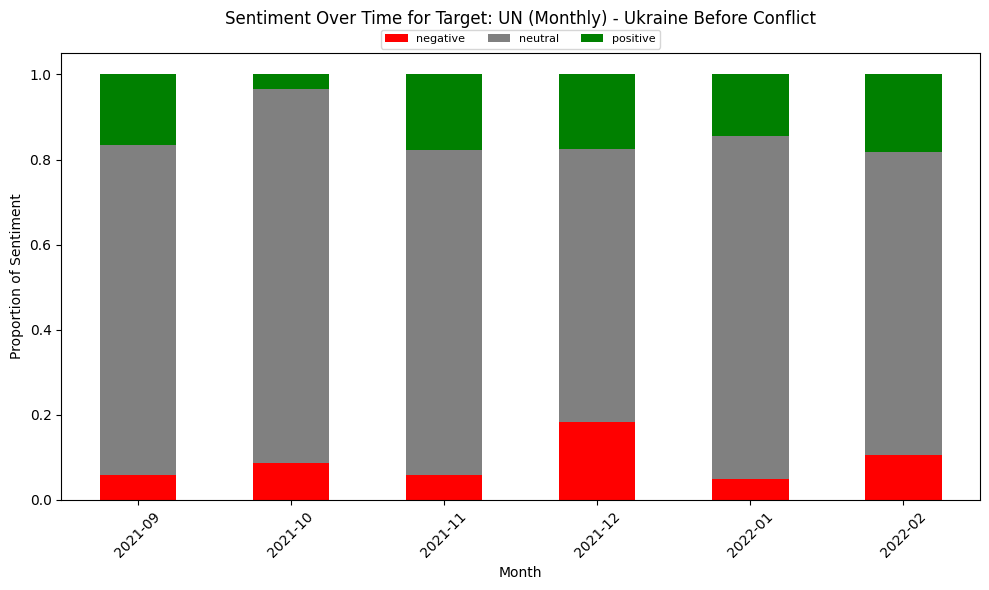

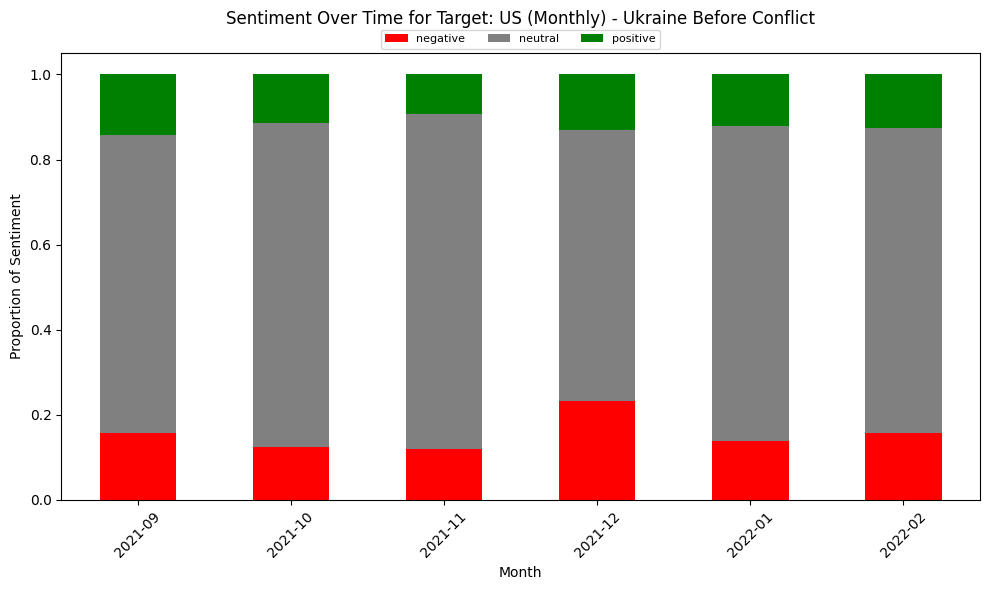

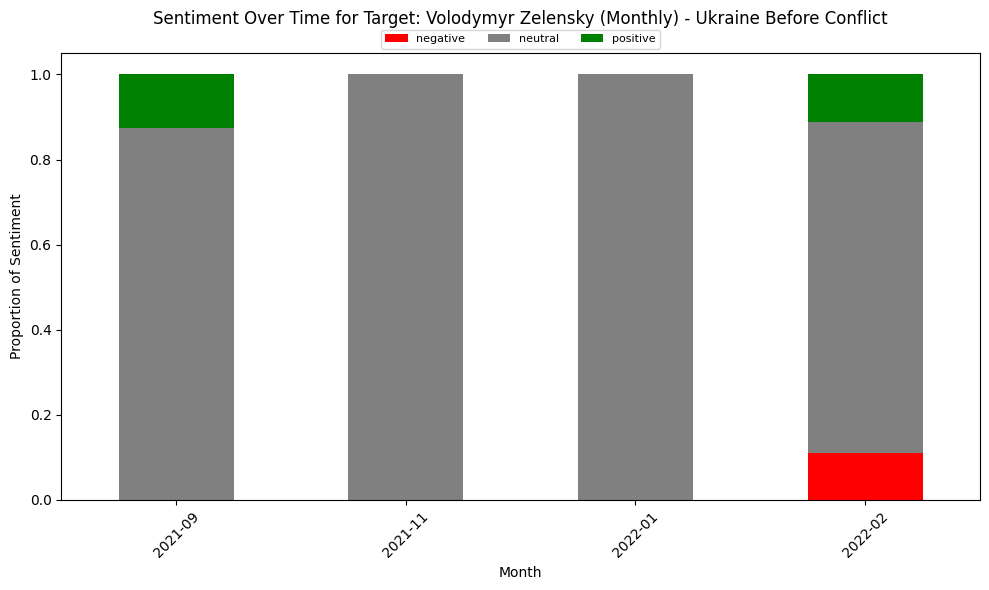

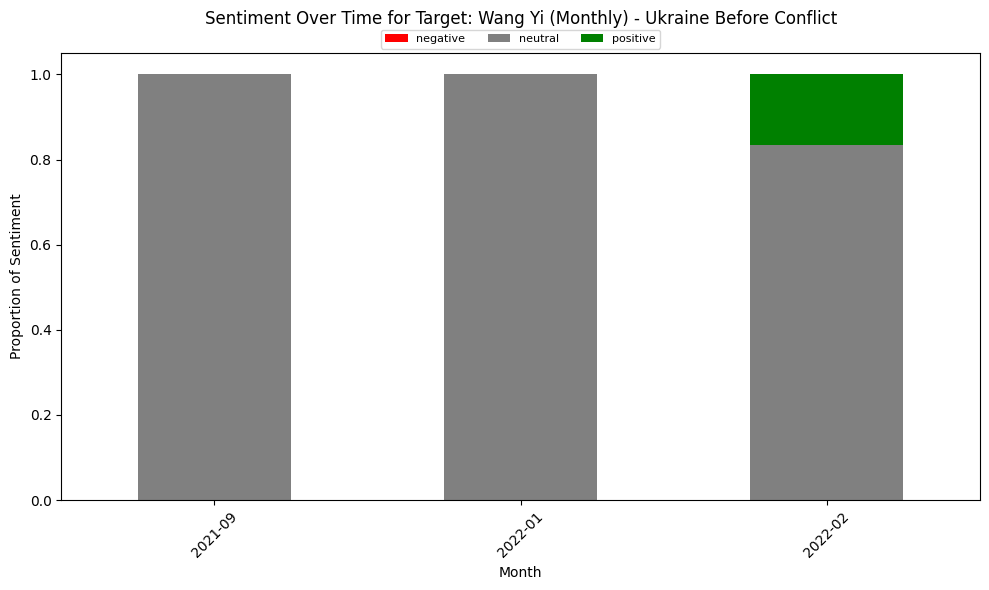

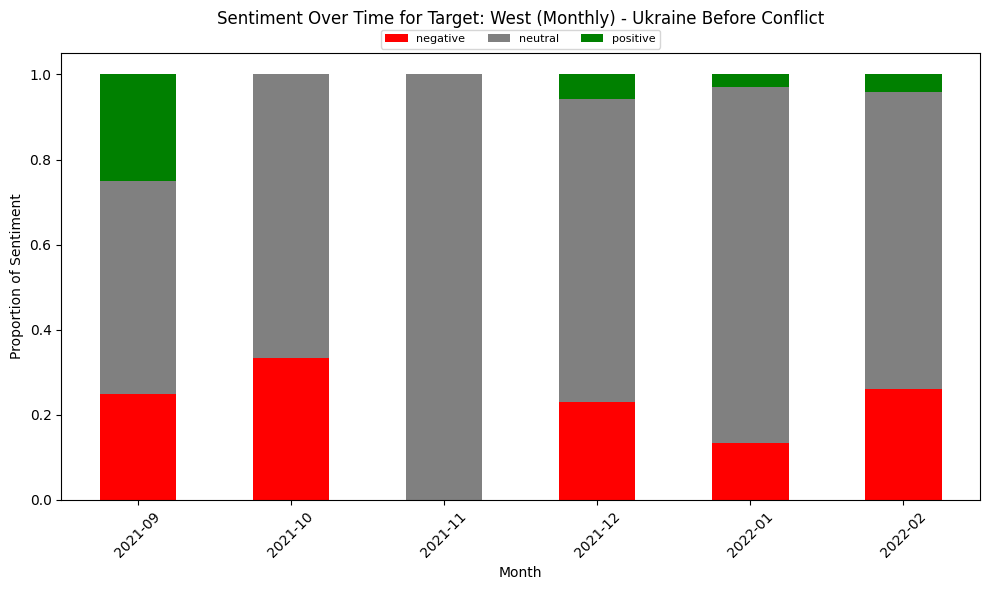

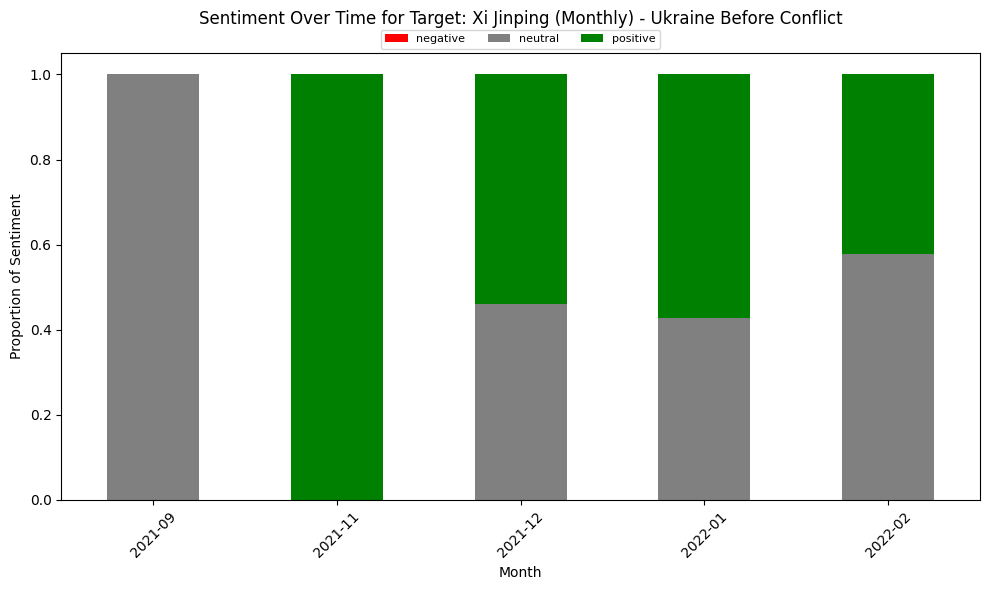

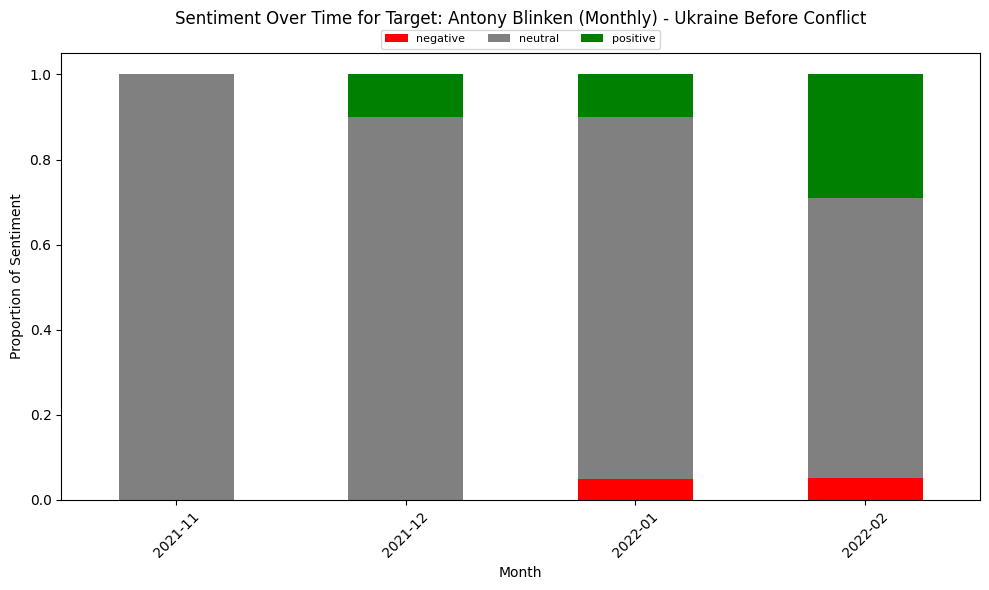

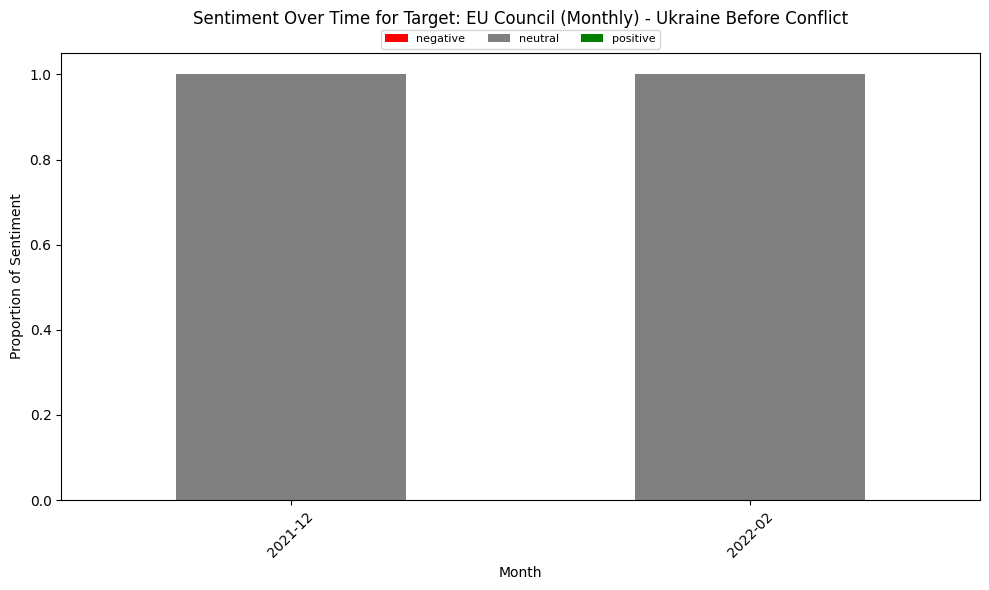

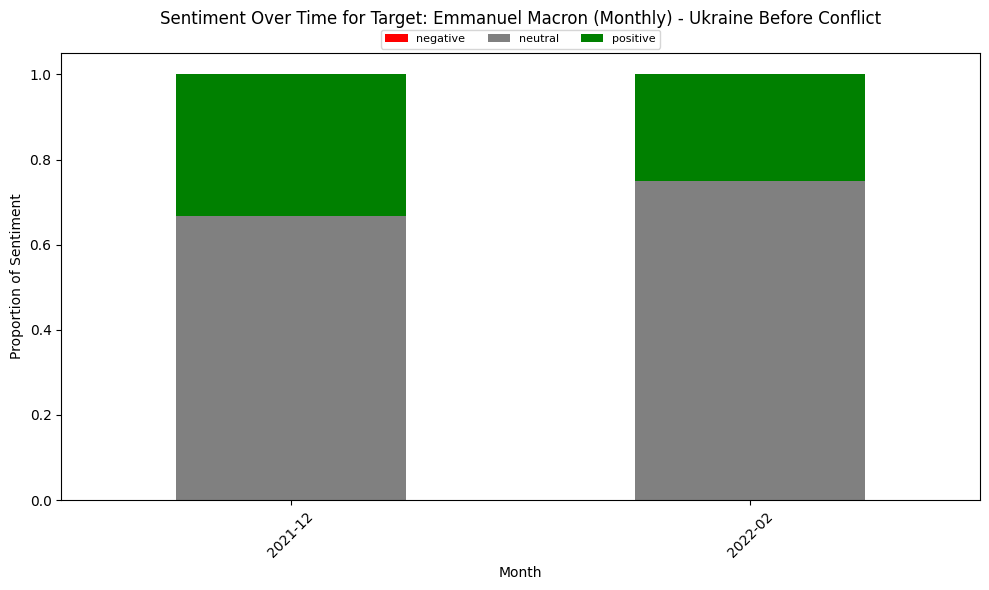

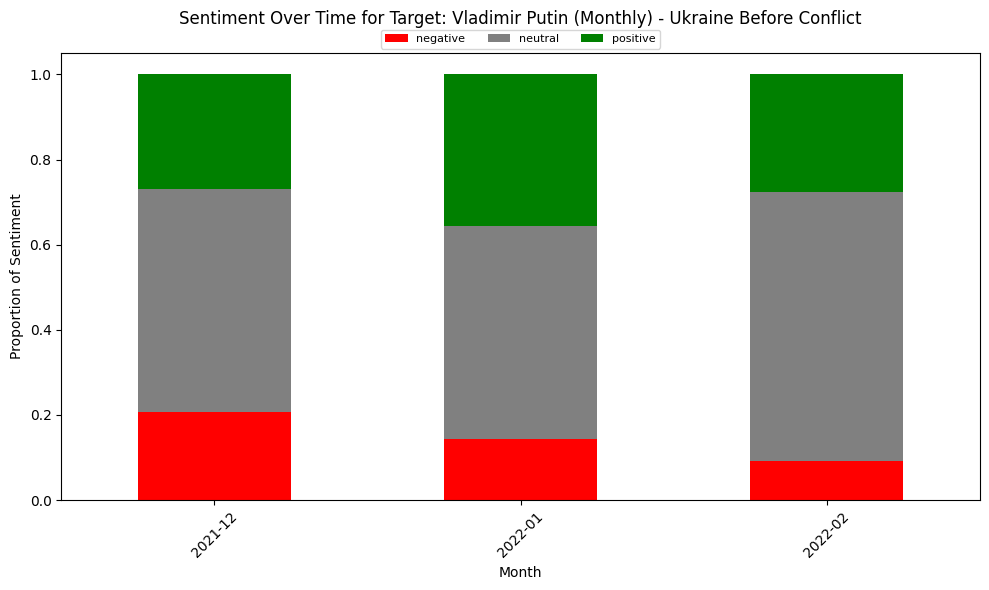

In [ ]:
#sentiment over time by target - monthly
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#group by month and target, count sentiment occurrences
sentiment_over_time = tsc_results_df.groupby(['month', 'Target', 'Sentiment']).size().unstack(fill_value=0)

#normalize to get sentiment proportions over time
sentiment_over_time_proportion = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0)

#plot sentiment over time for each target (monthly) using stacked bar chart
for target in sentiment_over_time_proportion.index.get_level_values('Target').unique():
    target_data = sentiment_over_time_proportion.xs(target, level='Target')

    months = target_data.index.astype(str)
    target_data.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], figsize=(10, 6))
    plt.title(f'Sentiment Over Time for Target: {target} (Monthly) - Ukraine Before Conflict\n')
    plt.xlabel('Month')
    plt.ylabel('Proportion of Sentiment')
    plt.xticks(rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.065), ncol=3, fontsize=8)
    plt.tight_layout()
    plt.show()

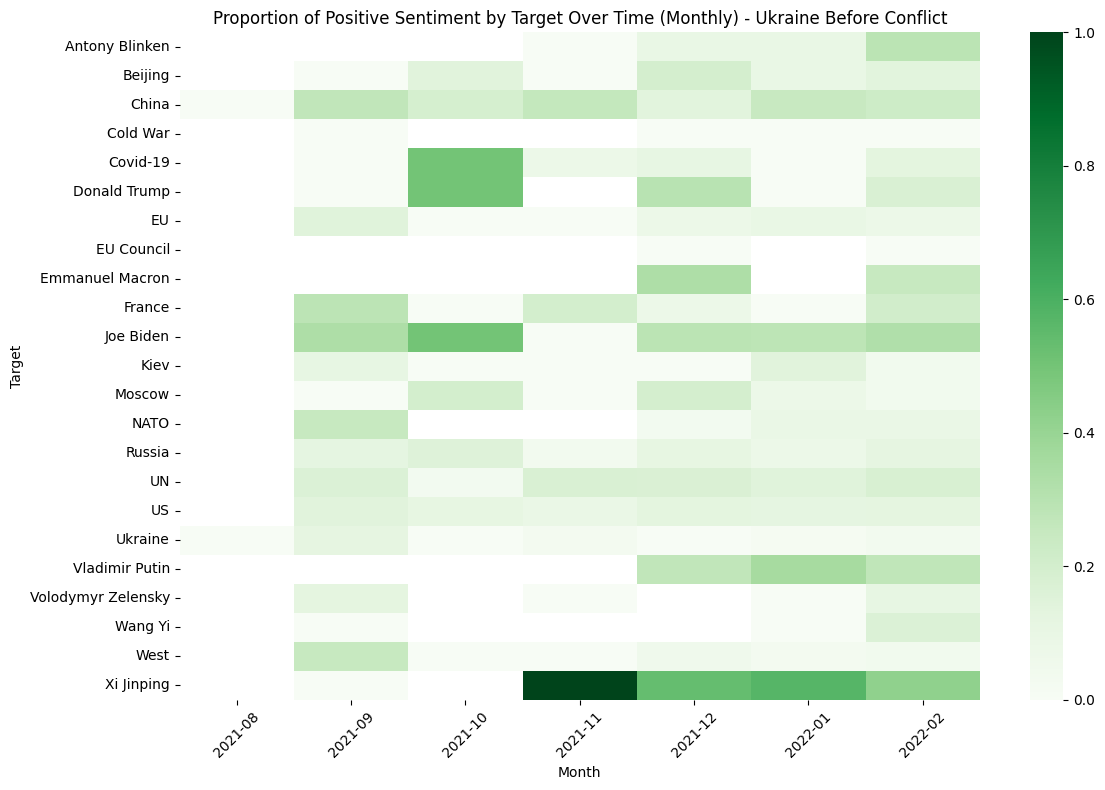

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'positive').mean())

#heatmap showing the proportion of positive sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=False, cbar=True)
plt.title('Proportion of Positive Sentiment by Target Over Time (Monthly) - Ukraine Before Conflict')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

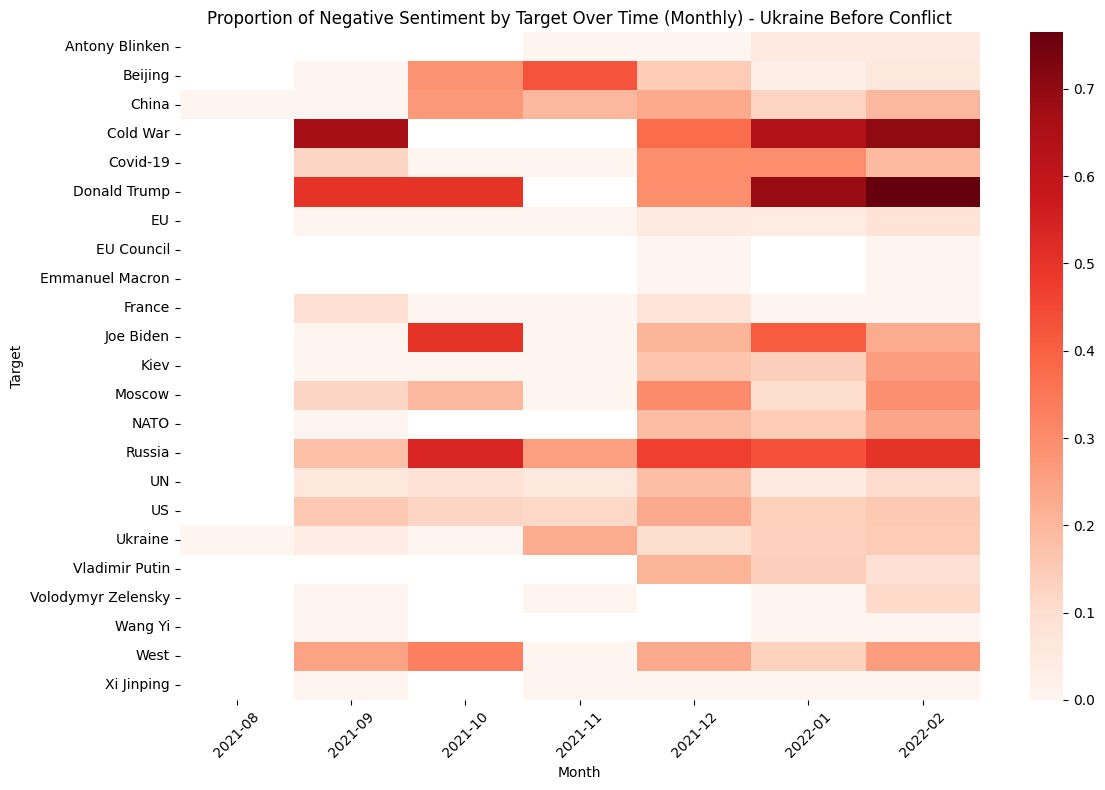

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'negative').mean())

#heatmap showing the proportion of negative sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=False, cbar=True)
plt.title('Proportion of Negative Sentiment by Target Over Time (Monthly) - Ukraine Before Conflict')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

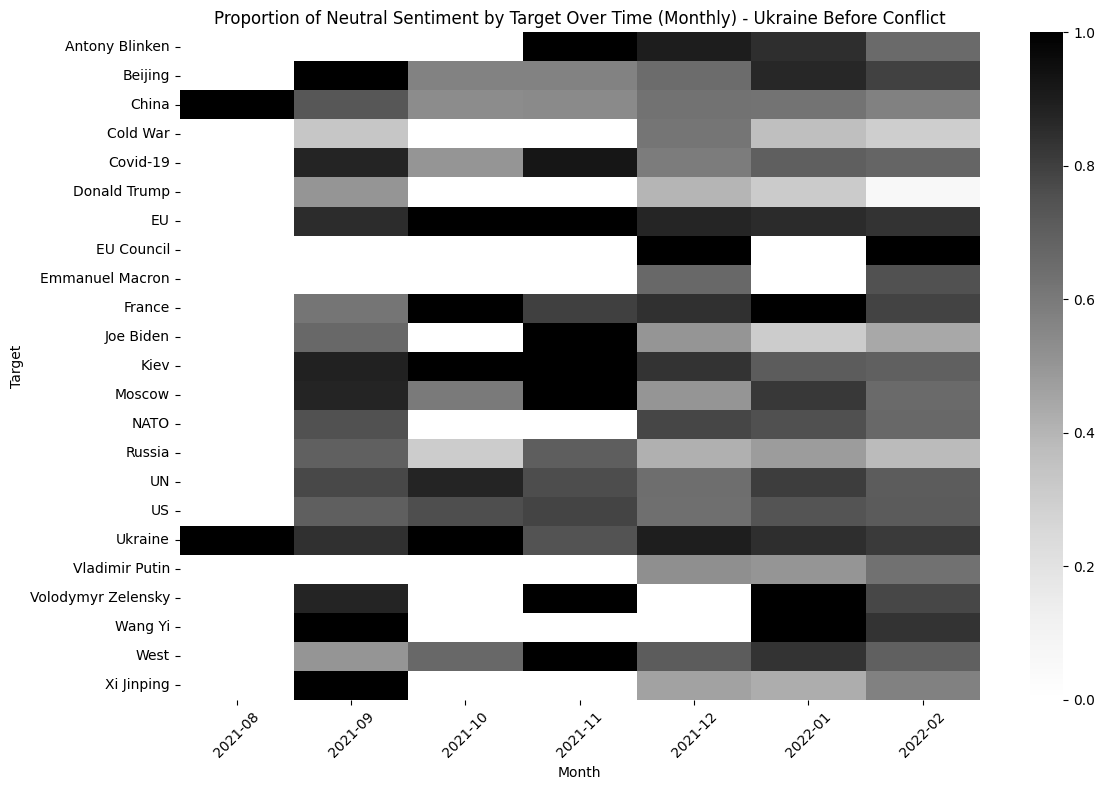

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'neutral').mean())

#heatmap showing the proportion of neutral sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greys', annot=False, cbar=True)
plt.title('Proportion of Neutral Sentiment by Target Over Time (Monthly) - Ukraine Before Conflict')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()